Muslimov Arthur, Last Checkpoint: 03/05/2020  <br/>
                 Last Checkpoint: 11/30/2021

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%matplotlib inline

In [5]:
%xmode Plain

Exception reporting mode: Plain


С доступом и измерением мы уже разобрались. Настало время изучить сортировку.    <br/>
Существует много алгоритмов сортировки и все они, как минимум, очень интересны.  <br/>
Если ты уже знаком с некоторыми из них, то тебе, наверное уже снились сны, а     <br/>
может и кошмары, смотря какой у тебя темперамент.

Например, вот ***сортировка выбором*** (selection sort). Её можно  <br/>
сделать буквально в нескольких строчках кода на Python.

In [6]:
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])  # находим индекс следующующего минимума
        (x[i], x[swap]) = (x[swap], x[i])  # меняем местами текующий и минимальный элемент
    return x

x = np.array([3, 1, 4, 2, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

Сортировка выбором удобна, т.к. проста, но при этом, относительно        <br/>
других сортировок, медленна. Для списка из N значений она требует        <br/>
N проходов цикла, в каждом из которых выполняется ~N сравнений.          <br/>
По "О-большому", о котором мы поговорим чуть позже, временная            <br/>
сложность сортировки вставкой в среднем равна $O[N^2]$.

> Даже сортировка выбором гораздо лучше моего фаворита среди всех  <br/>
> алгоритмов сортировки - ***случайной сортировки***(bogosort)

In [7]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

Этот алгоритм надеется на чисто везение. При средней сложности порядка $O[N×N!]$  <br/>
его не следует использовать в реальной производственной среде.

## Быстрая сортировка в библиотеке NumPy: функции `np.sort()` и `np.argsort()`

Хотя у нас в распоряжении есть и ванильные функции `sort()` и `sorted()`,  <br/>
мы будем использовать NumPy-версии, т.к. они намного более эффективны      <br/>
и заточены под наши массивы. По умолчанию все они используют алгоритм      <br/>
***быстрой сортировки*** (quicksort), имеющий сложность $ O[N×\log {N}] $.

In [8]:
x = np.array([3, 2, 5, 1, 4])
np.sort(x)  # функция, возвращает отсортированный массив не меняя входной

array([1, 2, 3, 4, 5])

In [9]:
print(x)
x.sort()  # метод, сортирует имеющийся массив
x

[3 2 5 1 4]


array([1, 2, 3, 4, 5])

Есть также и родственная им функция `np.argsort()`, возвращающая  <br/>
индекси отсортированных элементов.

In [10]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)  # входной массив она не меняет
print(i)
x[i]  # применяя транслирование, можно получить отсортированный массив

[1 0 3 2 4]


array([1, 2, 3, 4, 5])

**Сортировка по строкам и столбам**. У алгоритмов сортировки NumPy  <br/>
есть полезная возможность выбирать ось аргументом axis.

In [11]:
rand = np.random.RandomState(42)
x = rand.randint(0, 10, (3, 4))
x

array([[6, 3, 7, 4],
       [6, 9, 2, 6],
       [7, 4, 3, 7]])

In [12]:
np.sort(x, axis=0)  # сортируем стобцы

array([[6, 3, 2, 4],
       [6, 4, 3, 6],
       [7, 9, 7, 7]])

In [13]:
np.sort(x, axis=1)  # сортируем строки

array([[3, 4, 6, 7],
       [2, 6, 6, 9],
       [3, 4, 7, 7]])

Если связь между элементами строк или столбцов была, то она утеряна.

## Частичные сортировки: секционирование

Если тебе не нужен сортированный массив, а только `K` наименьших значений  <br/>
в нём, используй функцию `np.partition()`, принимающую массив и `K`.

In [14]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)  # делит массив на два сегмента. Первые три элемента- наименьшеие, после них идут
                    # прочие элементы. Оба сегмента хранят значения в произвольном порядке.

array([2, 1, 3, 4, 6, 5, 7])

По аналогии с `np.argsort()` есть `np.argpartition()`, выдающая индексы первых  <br/> 
`K` наименьших. Её мы испытаем на деле в следующем подразделе.

In [15]:
print("x:", x, end="\n\n")

indexes = np.argpartition(x, 3)
print("indexes:", indexes)
print("x[indexes]:", x[indexes])

x: [7 2 3 1 6 5 4]

indexes: [1 3 2 6 4 5 0]
x[indexes]: [2 1 3 4 6 5 7]


## Пример: `K` ближайших соседей

И так, у нас есть координаты 5-ти точек, и нам нужна возможность найти  <br/>
ближайших соседей любой из них. По стандартным соглашениями             <br/>
они будут находится в массиве 5×2.

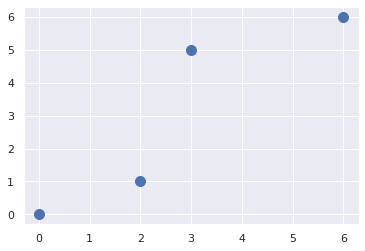

In [18]:
X = np.array([[0, 0],
              [2, 1],
              [3, 5],
              [6, 6]])  # берём простенький пример
plt.scatter(X[:, 0], X[:, 1], s=100);  # подавляем вывод символом ;
                            # X[:, 0] - это координаты по оси x, а X[:, 1] - по оси y

Давай вспомним правило школьного курса алгебры (вроде даже за 7 класс).  <br/>
$ \vec{|xy|} = \sqrt {(x_1 - x_0)^2 + (y_1 - y_0)^2} $

In [20]:
difference = X[np.newaxis, :] - X[:, np.newaxis]  # для каждой точки находим расстояния от других точек.
                    # Да, сходу не поймёшь, если нет опыта. Нужно просто хорошенько подумать и, желательно, долго
    
difference.shape  # добавляется измерение, где элементы высшего порядка - это расстояния от данной точки до других

(4, 4, 2)

In [21]:
dif_sq = difference**2  # возводим расстояния по осям координат в квадрат
                # или np.power(difference, 2)
dif_sq.shape

(4, 4, 2)

In [22]:
dist_sq = dif_sq.sum(axis=-1)  # суммируем квадраты расстояний
                    # что значит axis=-1? Тут такая-же фишка, как и с индексами массивов. 
                    # Получается, что мы здесь выбираем последнее измерение
dist_sq

array([[ 0,  5, 34, 72],
       [ 5,  0, 17, 41],
       [34, 17,  0, 10],
       [72, 41, 10,  0]])

Да! Теперь мы знаем расстояния каждых точек друг от друга. Первая  <br/>
строчка здесь - это расстояния от первой точки до других. Почему   <br/>
первым идёт 0? Потому что расстояние до самого себя - ноль.

In [25]:
dist_sq.diagonal()  # расстояния точек до самих себя

array([0, 0, 0, 0])

Т.к. нам не требуется точного расстояния, мы не будем вычислять корни. Воспользуемся  <br/>
функцией `np.argsort()` для получения индексов сортированных элементов                <br/>
по строкам. Т.е. мы получим те самые индексы ближайших соседей.

In [27]:
nearest = np.argsort(dist_sq)
nearest

array([[0, 1, 2, 3],
       [1, 0, 2, 3],
       [2, 3, 1, 0],
       [3, 2, 1, 0]])

Заметим, что первый столбец идёт в порядке возрастания с 0 до 3.  <br/>
И это правильно, т.к. ближайший сосед каждой точки - она сама.

В принципе, чтобы найти `K` ближайших соседей, нам даже не нужно было  <br/> 
отсортировывать строки полностью. У нас же есть функция                <br/>
`np.argpartition()`! Допустим, нужно по 2 соседа с каждой точки.

In [29]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)  # K+1 т.к. ближайшая точка к данной - это она сама
nearest_partition

array([[0, 1, 2, 3],
       [1, 0, 2, 3],
       [2, 3, 1, 0],
       [2, 3, 1, 0]])

Мы можем даже визуализировать получившующся сетку.

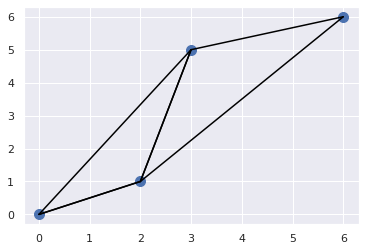

In [31]:
plt.scatter(X[:, 0], X[:, 1], s=100)
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, 1:K+1]:
        # рисуем линии от ближайших соседей до текущей точки
        plt.plot(*zip(X[j], X[i]), color="black")

Да, так гораздо лучше. Может показаться странным, что из центральных  <br/>
точек идут не две, а три линии. Но это всего лишь значит, что они     <br/>
оказывались близкими ещё для кого-то.

Да, ты можешь заявить, что можно было обойтись без транслирования      <br/>
и построчной сортировки, просто пойдя через понятный цикл. Но          <br/>
как бы ты ни старался, средства NumPy всё-равно окажутся эффективнее.

> Наконец, отмечу, что для выполнения поисков соседей в очень больших          <br/>
> массивов данных существуют основанные на деревьях и/или аппроксимационные    <br/>
> алгоритмы, масштабирующиеся как $ O[N\log {N}] $: или даже лучше,            <br/>
> в отличии от грубого подхода $ O[N^2] $. Один из примеров таких алгоритмов - <br/>
> \- K-мерное дерево (KD-tree), реализованное в библиотеке Scikit-Learn.

##### Нотация "О-большого"

Нотация "О-большого" позволяет оценивать разницу по времени алгоритма,      <br/>
беря во внимание размеры входных массивов. Например, если алгоритм          <br/>
со сложностью $ O[N] $ (читается "порядка N") справляется с массивом        <br/>
размером 1000 за 1 секунду, то за 5 секунд он будет способен обработать     <br/>
массив размером 5000  элементов. N здесь показывает кол-во элементов        <br/>
во входном массиве. Если алгоритм имел бы сложность $ O[N^2] $, то          <br/>
с массивом размером 5000 элементов он бы справился уже за 25 секунд. Стоит  <br/> 
отметить, что нотация "О-большого" не даёт точного времени для алгоритмов.  <br/>
Также не стоит путать её с другими менее используемыми нотациями, вроде     <br/>
"о-маленького", "θ-большого", "Ω-большого" и их многочисленными гибридами.